In [15]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

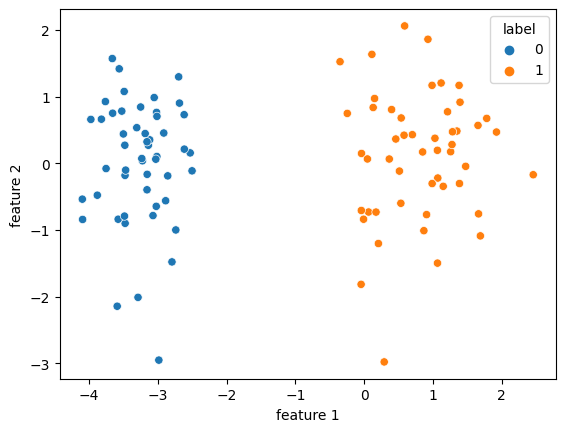

In [16]:
from sklearn.datasets import make_classification

data,labels = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                                    n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=20)


df = pd.DataFrame(data,columns = ['feature 1','feature 2'])
df['label'] = labels

X,y = df[['feature 1','feature 2']],df['label']

sns.scatterplot(data = df, x = 'feature 1' , y = 'feature 2', hue = 'label')
plt.show()

## Perceptron

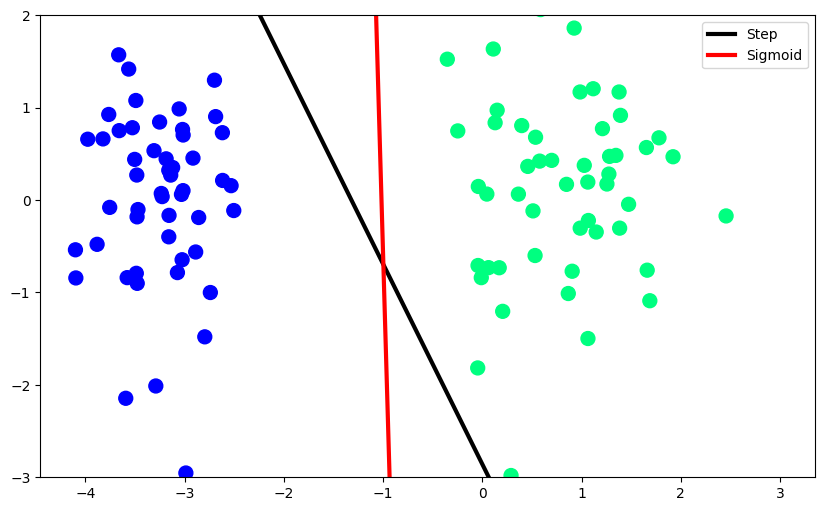

In [17]:
class Perceptron:

  def __init__(self,learning_rate,epochs,activation):
    self.y_pred = None
    self.coef_ = None
    self.intercept_ = None
    self.w = None
    self.epochs = epochs
    self.activation = activation
    self.learning_rate = learning_rate

  def activate(self,val):
    if self.activation == 'step':
      return 1 if val>0 else 0

    elif self.activation == 'sigmoid':
      return 1 / (1 + np.exp(-val))

  def fit(self, X_train, y_train):

    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_train = np.insert(X_train,0,1,axis=1)
    self.w = np.ones(X_train.shape[1])

    for i in range(self.epochs):
      idx = np.random.randint(0,X_train.shape[0])
      y_hat = self.activate(X_train[idx].dot(self.w))
      self.w = self.w + self.learning_rate * (y_train[idx] - y_hat)*X_train[idx]

    self.coef_ = self.w[1:]
    self.intercept_ = self.w[0]

  def predict(self, X_test):
    X_test = np.insert(X_test, 0, 1, axis=1)
    return np.array([self.activate(x.dot(self.w)) for x in X_test])

  def slope(self):
    return -self.coef_[0] / self.coef_[1]

  def intercept(self):
    return -self.intercept_ / self.coef_[1]


model1 = Perceptron(learning_rate = 0.1 ,epochs = 1000, activation = 'step')
model1.fit(df[['feature 1','feature 2']],df['label'])
m1,b1 = model1.slope(), model1.intercept()

model2 = Perceptron(learning_rate = 0.1 ,epochs = 1000, activation = 'sigmoid')
model2.fit(df[['feature 1','feature 2']],df['label'])
m2,b2 = model2.slope(), model2.intercept()

x_input = np.linspace(-3,3,100)
y_step = m1 * x_input + b1
y_sigmoid = m2 * x_input + b2

plt.figure(figsize=(10,6))
plt.plot(x_input,y_step,color='black',linewidth=3,label = 'Step')
plt.plot(x_input,y_sigmoid,color='red',linewidth=3,label = 'Sigmoid')
plt.scatter(data[:,0],data[:,1],c=labels,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()
plt.show()

## Model from Scratch

In [65]:
class LogisticRegressor:

  def __init__(self,learning_rate,epochs):
    self.y_pred = None
    self.coef_ = None
    self.intercept_ = None
    self.w = None
    self.epochs = epochs
    self.learning_rate = learning_rate

  def sigmoid(self,val): return 1 / (1 + np.exp(-val))

  def fit(self, X_train, y_train):

    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_train = np.insert(X_train,0,1,axis=1)
    self.w = np.ones(X_train.shape[1])

    for i in range(self.epochs):
      y_hat = self.sigmoid(X_train.dot(self.w))
      self.w = self.w + (self.learning_rate / len(X_train)) * np.dot((y_train - y_hat).T, X_train).T

    self.coef_ = self.w[1:]
    self.intercept_ = self.w[0]

  def predict(self,X_test):
    X_test = np.array(X_test)
    X_test = np.insert(X_test, 0, 1, axis=1)
    probabilities = [self.sigmoid(x.dot(self.w)) for x in X_test]
    predictions = [1 if p >= 0.5 else 0 for p in probabilities]
    return np.array(predictions)

  def predict_proba(self,X_test):
    X_test = np.array(X_test)
    X_test = np.insert(X_test, 0, 1, axis=1)
    return np.round([self.sigmoid(x.dot(self.w)) for x in X_test],4)

  def accuracy(self, y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    correct_predictions = np.sum(y_true == (y_pred >= 0.5))
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy

  def confusion_matrix(self, y_true, y_pred, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for i in range(num_classes):
        for j in range(num_classes):
            cm[i, j] = np.sum((y_true == i) & (y_pred == j))
    
    return cm

model = LogisticRegressor(learning_rate = 0.5,epochs = 10000)
model.fit(X,y)
y_pred = model.predict(X)
model.confusion_matrix(y,y_pred,2)

array([[50,  0],
       [ 0, 50]])

## sk-Learn Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

lor = LogisticRegression(penalty = None, solver='sag',max_iter=1200)
lor.fit(X,y)
y_pred = lor.predict(X)
print('Accuracy :',accuracy_score(y,y_pred))
confusion_matrix(y,y_pred)

Accuracy : 1.0


array([[50,  0],
       [ 0, 50]])

## Comparison

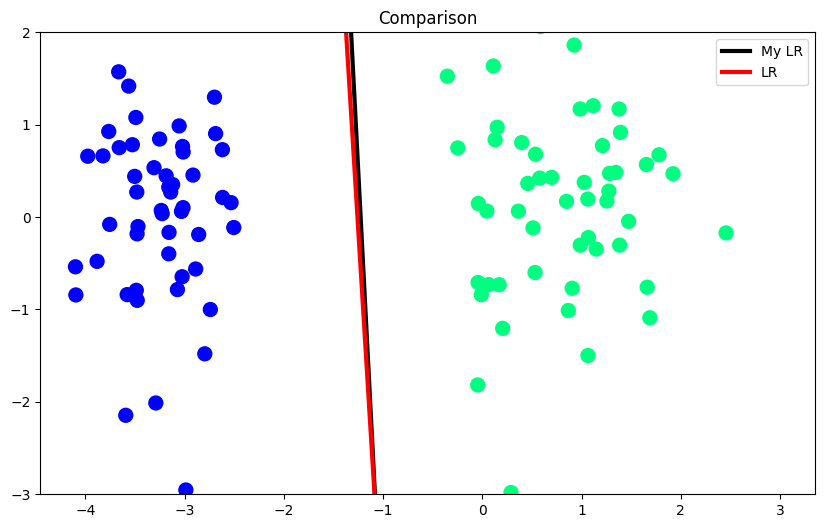

In [67]:
m1 = -(model.coef_[0]/model.coef_[1])
b1 = -(model.intercept_/model.coef_[1])

m2 = -(lor.coef_[0][0]/lor.coef_[0][1])
b2 = -(lor.intercept_/lor.coef_[0][1])

y_mylr = m1 * x_input + b1
y_lr = m2 * x_input + b2

plt.figure(figsize=(10,6))
plt.plot(x_input,y_mylr,color='black',linewidth=3,label = 'My LR')
plt.plot(x_input,y_lr,color='red',linewidth=3,label = 'LR')
plt.scatter(data[:,0],data[:,1],c=labels,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()
plt.title('Comparison')
plt.show()